Одна з найбільш поширених **проблем**, що зустрічаються в computer science - це проблема сортування якогось набору даних.

Сортування - одна з найкраще вивчених областей CS і це має ефект в тому числі на те, що вам майже ніколи не доведеться реалізовувати свої алгоритми сортування. Але важливо розуміти деякі властивості цього класу алгоритмів, щоб навіть з готових імплементацій обрати правильну.

Також, алгоритми сортування іноді є прекрасним ілюстративним прикладом для **дизайну алгоритмів**.

In [346]:
SIZE = 1000

In [347]:
original_lst = list(range(SIZE))

In [348]:
import random

Перший алгоритм сортування, що ми розглянемо, називається selection sort.
Він влаштований дуже просто: два вкладених цикли порівнюють елементи між собою. 
В кінці другого цикла найменший елемент та елемент з першого цикла міняють місцям.

Асимптотична складність:

* Найгірший випадок: O(n**2)
* Найкращий випадок: O(n**2)
* Середній випадок: O(n**2)

In [349]:
def selection_sort(arr):
    size = len(arr)
    for i in range(size):
        min = i
        for j in range(i, size):
            if arr[j] < arr[min]:
                min = j
        arr[i], arr[min] = arr[min], arr[i]

In [350]:
random.shuffle(original_lst)
print(original_lst)
selection_sort(original_lst)
print(original_lst)

[154, 790, 580, 255, 339, 279, 153, 776, 47, 105, 565, 442, 266, 795, 987, 281, 702, 917, 301, 48, 435, 946, 666, 774, 96, 2, 119, 794, 389, 941, 822, 991, 813, 306, 683, 967, 733, 353, 453, 866, 542, 551, 993, 608, 860, 826, 875, 216, 158, 307, 742, 982, 288, 390, 369, 784, 939, 457, 166, 903, 898, 264, 317, 963, 507, 789, 15, 750, 97, 142, 713, 56, 800, 359, 829, 605, 242, 191, 709, 670, 99, 693, 315, 128, 284, 147, 473, 820, 691, 715, 843, 82, 995, 222, 42, 144, 215, 692, 304, 66, 999, 109, 674, 668, 883, 156, 127, 543, 559, 148, 862, 859, 953, 417, 682, 406, 698, 972, 869, 294, 360, 83, 861, 785, 568, 357, 68, 31, 616, 924, 50, 424, 751, 877, 645, 602, 257, 41, 434, 932, 421, 16, 912, 675, 260, 366, 882, 441, 615, 672, 957, 841, 77, 44, 648, 461, 901, 506, 54, 295, 79, 786, 386, 87, 328, 720, 906, 746, 731, 948, 935, 420, 194, 509, 106, 635, 961, 585, 609, 459, 712, 35, 254, 515, 253, 464, 403, 1, 233, 925, 690, 469, 243, 426, 349, 226, 71, 146, 740, 70, 65, 246, 429, 964, 592, 0, 

In [351]:
%%timeit

random.shuffle(original_lst)
selection_sort(original_lst)

12.7 ms ± 568 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [352]:
import random

from time import time
from functools import partial
from typing import Callable, Union, List, Iterable


def function_timer(function: Callable):
    start_time = time()
    function()
    return time() - start_time

def time_algs_by_mean(func: Callable, 
                      test_num: int, 
                      range_bounds: List[int], 
                      type_constr: type = list,
                      preparation: Callable = lambda arr: arr) -> List[float]:
    algorith_times = list()
    for range_bound in range_bounds:
        arr = preparation(type_constr(range(range_bound)))
        times_for_n: List[float] = [function_timer(
        partial(func,
                arr = arr,)
        ) for _ in range(test_num)]
        mean_running_time = sum(times_for_n)/len(times_for_n)
        algorith_times.append(mean_running_time)
    return algorith_times

In [353]:
def shuffle_pure_func(arr):
    random.shuffle(arr)
    return arr

def reverse_arr(arr):
    return arr[::-1]

In [354]:
RANGE_BOUND_MAX = 200
TESTS_NUM = 100

range_bounds = list(range(10, RANGE_BOUND_MAX))

selection_times: List[float] = time_algs_by_mean(selection_sort, TESTS_NUM, range_bounds, list, shuffle_pure_func)
selection_times_reverse: List[float] = time_algs_by_mean(selection_sort, TESTS_NUM, range_bounds, list, reverse_arr)
selection_times_already_sorted: List[float] = time_algs_by_mean(selection_sort, TESTS_NUM, range_bounds, list)

In [355]:
import matplotlib.pyplot as plt

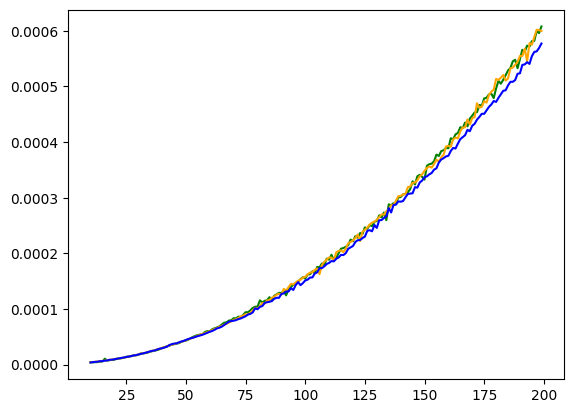

In [356]:
plt.plot(range_bounds, selection_times, color = "green")
plt.plot(range_bounds, selection_times_reverse, color = "orange")
plt.plot(range_bounds, selection_times_already_sorted, color = "blue")

Наступний алгоритм - insertion sort. За принципом роботи він схожий на перемішування карт у руці.

Асимптотична складність:

* Найгірший випадок: O(n**2)
* Найкращий випадок: O(n)
* Середній випадок: O(n**2)

In [357]:
def insertion_sort(arr):
    size = len(arr)
    for i in range(1, size):
        j = i - 1
        key = arr[i]
        while arr[j] > key and j >= 0:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

In [358]:
random.shuffle(original_lst)
print(original_lst)
insertion_sort(original_lst)
print(original_lst)

[570, 331, 205, 841, 359, 86, 21, 55, 297, 452, 197, 893, 614, 716, 339, 147, 238, 413, 154, 913, 731, 385, 848, 720, 248, 63, 98, 213, 726, 961, 837, 594, 551, 365, 114, 773, 432, 229, 272, 598, 53, 834, 621, 409, 580, 277, 948, 440, 425, 280, 400, 936, 814, 367, 511, 267, 573, 576, 482, 346, 967, 619, 84, 629, 744, 183, 930, 813, 260, 123, 771, 470, 64, 25, 95, 16, 312, 613, 558, 324, 820, 471, 780, 544, 397, 457, 751, 579, 808, 485, 724, 218, 945, 815, 643, 144, 120, 863, 254, 705, 494, 128, 323, 898, 908, 368, 691, 118, 964, 537, 669, 782, 951, 486, 704, 592, 940, 690, 46, 61, 351, 57, 993, 148, 717, 370, 498, 58, 917, 787, 167, 155, 59, 504, 202, 389, 464, 818, 689, 388, 318, 968, 636, 628, 623, 859, 420, 946, 626, 211, 988, 358, 111, 616, 764, 998, 221, 554, 447, 404, 770, 907, 47, 72, 977, 408, 212, 703, 311, 923, 565, 451, 992, 862, 525, 910, 130, 424, 685, 706, 191, 27, 269, 617, 264, 540, 460, 723, 246, 624, 445, 884, 847, 803, 478, 176, 496, 512, 224, 467, 881, 919, 304, 127

In [359]:
%%timeit

random.shuffle(original_lst)
insertion_sort(original_lst)

12.2 ms ± 612 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [360]:
RANGE_BOUND_MAX = 200
TESTS_NUM = 1000

range_bounds = list(range(10, RANGE_BOUND_MAX))

In [361]:
insertion_times: List[float] = time_algs_by_mean(insertion_sort, TESTS_NUM, range_bounds, list, shuffle_pure_func)
insertion_times_reverse: List[float] = time_algs_by_mean(insertion_sort, TESTS_NUM, range_bounds, list, reverse_arr)
insertion_times_already_sorted: List[float] = time_algs_by_mean(insertion_sort, TESTS_NUM, range_bounds, list)

ValueError: x and y must have same first dimension, but have shapes (990,) and (190,)

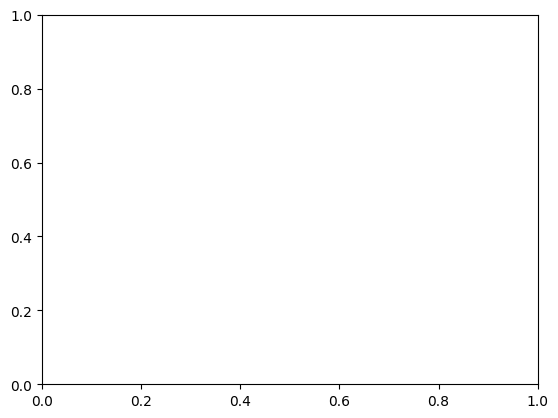

In [380]:
plt.plot(range_bounds, insertion_times, color = "green")
plt.plot(range_bounds, insertion_times_reverse, color = "orange")
plt.plot(range_bounds, insertion_times_already_sorted, color = "blue")

In [363]:
RANGE_BOUND_START = 10
RANGE_BOUND_MAX = 1000
TESTS_NUM = 50

range_bounds = list(range(RANGE_BOUND_START, RANGE_BOUND_MAX))

In [364]:
insertion_times_big_arr: List[float] = time_algs_by_mean(insertion_sort, TESTS_NUM, range_bounds, list, shuffle_pure_func)


In [365]:
insertion_times_reverse_big_arr: List[float] = time_algs_by_mean(insertion_sort, TESTS_NUM, range_bounds, list, reverse_arr)

In [366]:
insertion_times_already_sorted_big_arr: List[float] = time_algs_by_mean(insertion_sort, TESTS_NUM, range_bounds, list)

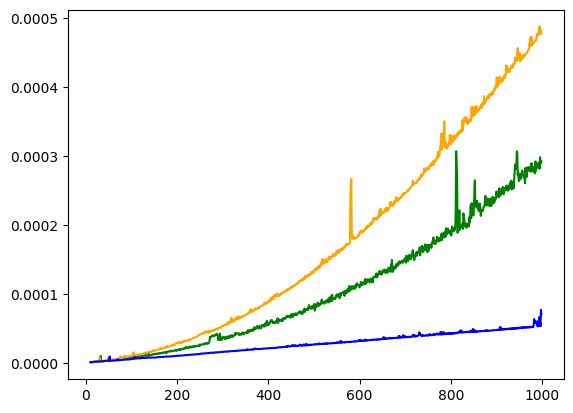

In [379]:
plt.plot(range_bounds, insertion_times_big_arr, color = "green")
plt.plot(range_bounds, insertion_times_reverse_big_arr, color = "orange")
plt.plot(range_bounds, insertion_times_already_sorted_big_arr, color = "blue")

Сортування вставками має декілька важливих властивостей:

* Це in-place алгоритм (споживає тільки О(1) пам'яті). Це ж поширюється і на selection sort.
* Це стабільний алгоритм (якщо ви відсортуєте список об'єктів спочатку за одним полем, а потім за іншим, порядок, встановлений за першим полем, буде збережено)
* Це онлайн-алгоритм (він здатен сортувати без отримання всього набору елементів за раз)
* Цей алгоритм працює за **лінійний час** на так званих частково відсортованих послідовностях (вона є такою, якщо елемент знаходиться не більше ніж у k позиціях від істиної). Повна оцінка тоді буде O(k*n)

Сортування вставками іноді використовується як додаткова частина гібридних алгоритмів сортування (наприклад у стандартному алгоритмі сортування Python під назвою Timsort)

Наступний алгоритм, котрий є сенс розглянути - сортування Шелла.

Асимптотична складність:

* Найгірший випадок - O(n**2)
* Найкращий випадок - O(n*log(n))
* Середній випадок - **невідомий**

Власне, сам принцип сортування Шелла базується на порівнянні елементів, що рівновіддалені на деяке число k по індексу. Після проходження до кінця масиву, цей k зменшується певним чином, щоб, в кінці кінців, сталося порівняння кожного елементу з наступним. Відомо, що асимптотична складність сортування Шелла дуже сильно залежить саме від виду цих послідовностей. Для імплементації нижче використана так звана послідовність Кнута.

In [368]:
from typing import List, TypeVar

T = TypeVar("T")


def shell_sort(array_to_sort: List[T]) -> None:
    """From the signature we know that our method does not return anything.
    Basically it performs the side effect: it sorts the variable array_to_sort and treats it as mutable"""
    array_length: int = len(array_to_sort)
    shell_sort_step: int = 1
    # Recursively founding the closest member of Knuths sequence
    while shell_sort_step <= array_length // 3:
        shell_sort_step = 3 * shell_sort_step + 1
    while shell_sort_step > 0:
        # First loop maintains the Shellsort step ascending sequence
        for pointer in range(shell_sort_step, array_length, 1):
            # Second loop maintains the pointer for each h-sorting iterations
            # It's important to maintain the item_to_compare variable as it
            # stores our value for compare with other memmbers of h-sequence
            item_to_compare: T = array_to_sort[pointer]
            for decremented_pointer in range(pointer, 0, -shell_sort_step):
                # Third loop maintains insertion sort with the step value h.
                # It will iterate through the whole array with step h.
                preceeding_item: T = array_to_sort[
                    decremented_pointer - shell_sort_step
                ]
                item: T = array_to_sort[decremented_pointer]
                if preceeding_item > item:
                    # We are doing the swap in the following technique because we need to swap within array
                    array_to_sort[decremented_pointer] = preceeding_item
                    array_to_sort[decremented_pointer - shell_sort_step] = item
                if preceeding_item < item_to_compare:
                    # When we found the item which less than item we compare, we stop the swap process
                    array_to_sort[decremented_pointer] = item_to_compare
                    break
        shell_sort_step = shell_sort_step // 3

In [369]:
random.shuffle(original_lst)
print(original_lst)
shell_sort(original_lst)
print(original_lst)

[236, 320, 565, 298, 627, 132, 586, 946, 5, 335, 238, 82, 434, 575, 316, 836, 617, 436, 367, 213, 263, 463, 303, 532, 264, 348, 253, 742, 662, 769, 934, 979, 404, 308, 129, 293, 489, 208, 820, 708, 641, 180, 858, 189, 327, 834, 443, 359, 111, 60, 248, 561, 384, 268, 673, 490, 170, 748, 762, 279, 361, 666, 34, 402, 356, 790, 70, 683, 971, 741, 584, 174, 147, 851, 441, 171, 415, 559, 906, 476, 632, 29, 845, 982, 265, 821, 712, 663, 281, 9, 785, 90, 141, 57, 813, 7, 978, 44, 485, 469, 719, 941, 954, 89, 689, 460, 410, 352, 569, 405, 96, 499, 192, 669, 696, 658, 175, 235, 702, 852, 994, 751, 722, 413, 914, 622, 841, 27, 541, 975, 270, 379, 333, 468, 652, 162, 139, 501, 784, 754, 973, 577, 743, 900, 660, 51, 757, 214, 739, 10, 822, 165, 239, 414, 760, 142, 922, 603, 53, 449, 865, 287, 332, 219, 200, 896, 871, 759, 107, 883, 477, 467, 892, 245, 471, 642, 311, 198, 830, 240, 260, 503, 225, 809, 819, 479, 85, 566, 761, 824, 54, 514, 133, 593, 526, 986, 798, 249, 302, 440, 18, 963, 608, 74, 304

In [370]:
%%timeit

random.shuffle(original_lst)
shell_sort(original_lst)

3.57 ms ± 46.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [371]:
shell_sort_big_arr: List[float] = time_algs_by_mean(insertion_sort, TESTS_NUM, range_bounds, list, shuffle_pure_func)


In [372]:
shell_sort_reverse_big_arr: List[float] = time_algs_by_mean(insertion_sort, TESTS_NUM, range_bounds, list, reverse_arr)

In [373]:
shell_sort_already_sorted_big_arr: List[float] = time_algs_by_mean(insertion_sort, TESTS_NUM, range_bounds, list)

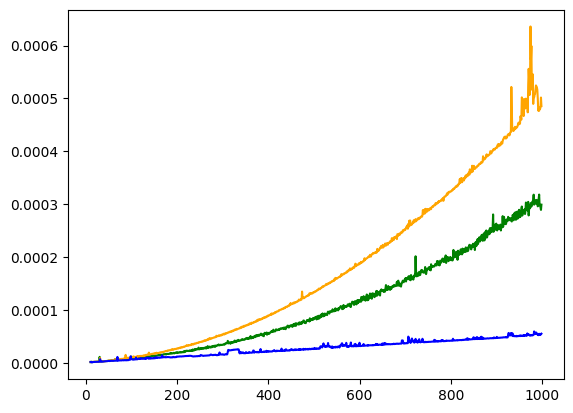

In [374]:
plt.plot(range_bounds, shell_sort_big_arr, color = "green")
plt.plot(range_bounds, shell_sort_reverse_big_arr, color = "orange")
plt.plot(range_bounds, shell_sort_already_sorted_big_arr, color = "blue")

Сортування Шелла:
* Адаптивне (працює швидше якщо вхідні дані частково відсортовані, див. сортування вставкою)
* Нестабільне

Наступний алгоритм - merge sort. 

Асимптотична оцінка:

* Найгірший випадок: O(n*log(n))
* Найкращий випадок: O(n*log(n))
* Середній випадок: O(n*log(n))

In [375]:
from typing import List, TypeVar

T = TypeVar("T")


def merge_sort(array_to_sort: List[T]) -> None:
    """From the signature we know that our method does not return anything.
    Basically it performs the side effect: it sorts the variable array_to_sort and treats it as mutable"""
    if len(array_to_sort) > 1:
        mid_index: int = len(array_to_sort) // 2
        left_subarray: List[T] = array_to_sort[:mid_index]
        right_subarray: List[T] = array_to_sort[mid_index:]

        # Recursive call on each half for splitting the arrays in half deeper
        merge_sort(left_subarray)
        merge_sort(right_subarray)
        # Call for merging the split arrays together with sorting.
        # Basically, on each call left array or right array substitutes our main array
        merge(array_to_sort, left_subarray, right_subarray)


def merge(
    array_to_sort: List[T], left_subarray: List[T], right_subarray: List[T]
) -> None:
    # Two iterators for traversing the two halves
    left_pointer: int = 0
    right_pointer: int = 0

    # Iterator for the main list
    original_array_pointer: int = 0

    while left_pointer < len(left_subarray) and right_pointer < len(right_subarray):
        if left_subarray[left_pointer] <= right_subarray[right_pointer]:
            # The value from the left half has been used
            array_to_sort[original_array_pointer] = left_subarray[left_pointer]
            # Move the iterator forward
            left_pointer += 1
        else:
            array_to_sort[original_array_pointer] = right_subarray[right_pointer]
            # The value from right half has been used
            right_pointer += 1
        # Move to the next slot in main array
        original_array_pointer += 1

    # For all the remaining values in either left or right array
    # we perform merge as we know that they are greater than already merged values
    while left_pointer < len(left_subarray):
        array_to_sort[original_array_pointer] = left_subarray[left_pointer]
        left_pointer += 1
        original_array_pointer += 1

    while right_pointer < len(right_subarray):
        array_to_sort[original_array_pointer] = right_subarray[right_pointer]
        right_pointer += 1
        original_array_pointer += 1

З точки зору дизайну алгоритмів, сортування злиттям є еталонним прикладом техніки divide-and-conquer

In [376]:
random.shuffle(original_lst)
print(original_lst)
merge_sort(original_lst)
print(original_lst)

[422, 790, 810, 601, 389, 861, 532, 111, 361, 809, 151, 687, 185, 294, 134, 182, 540, 680, 930, 340, 84, 346, 515, 419, 35, 269, 268, 433, 279, 511, 222, 208, 794, 539, 126, 913, 626, 653, 465, 498, 383, 528, 685, 908, 128, 252, 692, 64, 119, 6, 723, 447, 878, 729, 813, 299, 21, 888, 859, 353, 58, 181, 589, 60, 986, 700, 162, 709, 28, 267, 420, 722, 250, 284, 781, 925, 945, 803, 805, 76, 354, 835, 712, 657, 927, 584, 652, 741, 695, 614, 138, 585, 559, 438, 751, 245, 856, 281, 554, 49, 658, 647, 618, 642, 936, 331, 957, 871, 682, 304, 195, 292, 953, 136, 43, 488, 55, 504, 105, 598, 984, 742, 899, 149, 261, 448, 213, 923, 255, 469, 704, 668, 855, 321, 609, 471, 176, 264, 100, 467, 802, 1, 142, 152, 677, 573, 689, 206, 758, 89, 591, 24, 33, 705, 763, 632, 101, 91, 318, 59, 935, 444, 735, 29, 840, 962, 670, 439, 463, 678, 12, 613, 556, 920, 237, 795, 874, 344, 991, 921, 747, 950, 524, 501, 40, 334, 370, 749, 343, 341, 139, 387, 409, 951, 839, 764, 981, 797, 832, 131, 863, 88, 366, 487, 69,

In [377]:
from random import randint

T = TypeVar("T")


def shuffle(array: List[T]) -> None:
    """Simple implementation for Fisher-Yates shuffle algo.
    
    You can use random.shuffle() instead"""
    array_length: int = len(array)
    for index in range(array_length - 1, 0, -1):
        random_index: int = randint(0, index)
        array[index], array[random_index] = array[random_index], array[index]


def partition(array, begin, end):
    pivot = begin
    for i in range(begin + 1, end + 1):
        if array[i] <= array[begin]:
            pivot += 1
            array[i], array[pivot] = array[pivot], array[i]
    array[pivot], array[begin] = array[begin], array[pivot]
    return pivot


def quicksort(array, begin=0, end=None):
    shuffle(array)
    if end is None:
        end = len(array) - 1

    def _quicksort(array, begin, end):
        if begin >= end:
            return
        pivot = partition(array, begin, end)
        _quicksort(array, begin, pivot - 1)
        _quicksort(array, pivot + 1, end)

    return _quicksort(array, begin, end)

In [378]:
random.shuffle(original_lst)
print(original_lst)
quicksort(original_lst)
print(original_lst)

[933, 418, 758, 859, 292, 327, 264, 507, 433, 676, 974, 116, 623, 468, 649, 453, 948, 873, 840, 740, 715, 252, 183, 580, 351, 349, 404, 166, 922, 165, 221, 414, 340, 382, 559, 450, 773, 986, 696, 210, 123, 737, 718, 237, 764, 304, 548, 0, 52, 23, 202, 664, 753, 106, 458, 999, 880, 502, 271, 198, 395, 539, 778, 789, 611, 390, 222, 549, 833, 469, 659, 970, 637, 369, 547, 988, 111, 269, 153, 71, 599, 483, 962, 4, 870, 738, 614, 762, 66, 364, 636, 139, 209, 236, 888, 53, 694, 131, 158, 871, 430, 915, 149, 803, 40, 943, 730, 97, 274, 708, 632, 546, 124, 531, 328, 959, 671, 966, 884, 617, 58, 564, 366, 521, 960, 432, 783, 825, 7, 824, 556, 350, 818, 463, 646, 312, 374, 45, 495, 951, 573, 602, 107, 387, 990, 473, 535, 660, 899, 798, 582, 41, 393, 429, 963, 335, 88, 235, 944, 485, 345, 786, 644, 193, 408, 22, 917, 27, 12, 796, 911, 684, 686, 946, 809, 863, 325, 32, 736, 87, 314, 683, 998, 296, 689, 299, 89, 931, 629, 44, 384, 594, 552, 642, 6, 543, 709, 586, 961, 363, 212, 784, 550, 739, 171, 